In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load MNIST data
(train_images, _), (test_images, _) = mnist.load_data()

# Pre-processing (normalize pixel values between 0 and 1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Reshape to include channels (assuming grayscale images)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [2]:
# Define DAE model (replace with your specific architecture)
def create_dae_model():
    inputs = keras.Input(shape=(28, 28, 1))
    encoded = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
    decoded = keras.layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(encoded)
    decoded = keras.layers.UpSampling2D((2, 2))(decoded)
    decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)
    return keras.Model(inputs=inputs, outputs=decoded)

# Create and compile DAE model
model = create_dae_model()
model.compile(loss='binary_crossentropy', optimizer='adam')

# Train the DAE model (adjust epochs and batch size)
n_epochs = 30
batch_size = 64
model.fit(train_images, train_images, epochs=n_epochs, batch_size=batch_size)

# Save the trained model
model.save('mnist_dae_model.h5')

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.1747
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0650
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0636
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0630
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0625
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0623
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0621
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0618
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0617
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0616
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0614
Epoch 12/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0613
Epoch 13/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0613
Epoch 14/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0610
Epoch 15/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


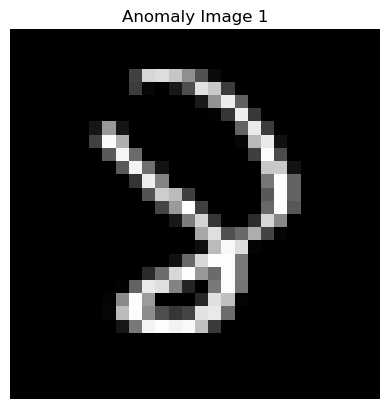

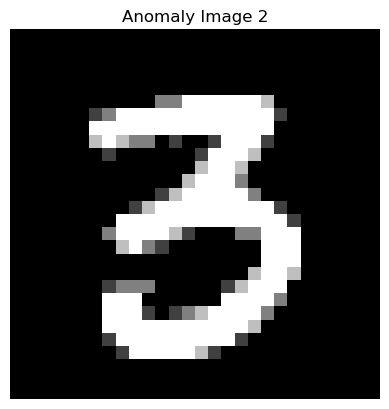

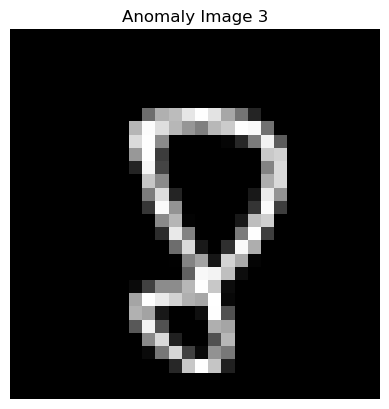

In [3]:
model = keras.models.load_model('mnist_dae_model.h5')


# Get reconstructions for test data
test_reconstructions = model.predict(test_images)

# Calculate reconstruction error (mean squared error)
reconstruction_error = np.mean(np.square(test_images - test_reconstructions), axis=(1, 2, 3))

# Define anomaly threshold based on your data analysis (e.g., 95th percentile)
threshold = np.quantile(reconstruction_error, 0.95)

# Identify anomalies based on reconstruction error exceeding threshold
anomaly_indices = np.where(reconstruction_error > threshold)[0]

# Get three random anomaly indices
anomaly_indices_to_display = np.random.choice(anomaly_indices, size=3, replace=False)

# Display and save anomaly images
for i, idx in enumerate(anomaly_indices_to_display):
    plt.figure()
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly Image {i+1}')
    plt.axis('off')
    plt.savefig(f'anomaly_image_{i+1}.jpg', bbox_inches='tight')

plt.show()